In [114]:
import pandas as pd
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [115]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [116]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [117]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [118]:
len(train_df) + len(test_df)

10876

In [119]:
# shuffle the training data 
train_data = train_df.sample(frac =1, random_state = 42)
train_data.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [120]:
# visulize the data
import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_data[["text", "target"]][random_index:random_index + 5].itertuples():
    _,text, target = row
    print(f"Target: {target}", "(real disater)" if target > 0 else "(not real disater)")
    print(f"Text: \n {text} \n")
    print("...\n")
    

Target: 0 (not real disater)
Text: 
 @whvholst @leashless And this is a structural problem rather than just a failure of competence by traditional soc democratic parties. 

...

Target: 0 (not real disater)
Text: 
 I SCREAMED 'WHATS A CHONCe' http://t.co/GXYivsWki7 

...

Target: 0 (not real disater)
Text: 
 @FaZe_Rain all hail the Cloud 

...

Target: 1 (real disater)
Text: 
 Typhoon Soudelor taking dead aim at Taiwan http://t.co/3Ac5wuy1R0 

...

Target: 0 (not real disater)
Text: 
 Violators of the new improved Reddit will be shot into the sun. Survivors will be hurled into a black hole and then nuked. 

...



In [121]:
# split the data inot training and validation set
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data["text"].to_numpy(),
                                                                           train_data["target"].to_numpy(),
                                                                           test_size =0.1,
                                                                           random_state = 42)

In [122]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [123]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [124]:
train_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

## Text Vectorization

In [125]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [126]:
# average number of words or tokens in training data
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [127]:
text_vectorizer = TextVectorization(max_tokens = 10000,
                                    output_mode = "int",
                                    output_sequence_length = 15)

In [128]:
# fit the text vectorizer to data
text_vectorizer.adapt(train_sentences)

In [129]:
# checking for the text vectorizer 
random_sentence = random.choice(train_sentences)
print(f"original {random_sentence}")
print(f"Vectorized: {text_vectorizer([random_sentence])}")

original @eggalie haha I love hurricane because of you
Vectorized: [[  1 847   8 110 346 152   6  12   0   0   0   0   0   0   0]]


In [130]:
# unique words in our dictionary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5 = words_in_vocab[:5]
bottom_5 = words_in_vocab[-5:]

print("Vocab", len(words_in_vocab))
print("Top 5 words:", top_5)
print("Bottom 5 words:", bottom_5)

Vocab 10000
Top 5 words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating Embeddings

In [131]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = 10000,
                            output_dim = 128,
                            embeddings_initializer = "uniform",
                            input_length = 15,
                            name = "embedding_1")
embedding

In [132]:
# example from sample data

random_sentence = random.choice(train_sentences)
print(f"original {random_sentence}")
print(f"Vectorized: {text_vectorizer([random_sentence])}")
print(f"Vectorized: {embedding(text_vectorizer([random_sentence]))}")

original I need an arcade shooter fix but CTE is empty &amp; only running obliteration. I'd even buy a CoD title if they weren't all overpriced on steam
Vectorized: [[   8  162   39    1 4635 2113   30    1    9 5731   35  126  876  536
   508]]
Vectorized: [[[ 0.01519376 -0.0233181   0.04915943 ... -0.04084576 -0.04359012
    0.01152353]
  [ 0.04639918  0.00330198 -0.04080838 ...  0.00779966 -0.01707214
   -0.02896821]
  [ 0.01898116 -0.00657962  0.00129762 ... -0.01735419  0.04049825
    0.03328992]
  ...
  [-0.03819742  0.03403808  0.04688605 ...  0.04019666 -0.01951964
    0.04713443]
  [ 0.02788652 -0.02451069  0.03905913 ... -0.02860194 -0.02970216
    0.04306314]
  [ 0.02649759 -0.00278244 -0.04084604 ... -0.03511374  0.00136449
    0.03049216]]]


## Creating Our Models

### 0. Naive Bayes - Baseline

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenizartiona and modelling the pipeline
model_0 = Pipeline([
    
    ("tfdf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfdf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [134]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [135]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

#### Creating Evaluation functions for our future use

In [136]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    
    # accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    
    # model_precision,f1_score, recall using weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    
    model_results = {
        
        "accurracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1
    }
    
    return model_results

In [137]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accurracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 - Simple Dense

In [138]:
# importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-04 08:15:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-04 08:15:19 (55.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [139]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [140]:
# create directory to save log 
SAVE_DIR = "model_logs"

In [141]:
# building the model 
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_choice")

In [142]:
# compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [143]:
model_1.summary()

Model: "model_1_choice"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129


In [144]:
# fit the model 
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231004-081519
Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.6093 - accuracy: 0.6958 - val_loss: 0.5361 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4418 - accuracy: 0.8206 - val_loss: 0.4692 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3470 - accuracy: 0.8609 - val_loss: 0.4588 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2854 - accuracy: 0.8920 - val_loss: 0.4637 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2384 - accuracy: 0.9126 - val_loss: 0.4760 - val_accuracy: 0.7887


In [145]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7887


[0.47604769468307495, 0.7887139320373535]

In [146]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.01596312, -0.02734495,  0.01050767, ..., -0.05528403,
          0.00534431, -0.00810083],
        [ 0.00367453,  0.01745513, -0.03607399, ..., -0.04037447,
          0.03302921, -0.00250512],
        [-0.01737417,  0.00057014,  0.02603259, ...,  0.02105457,
         -0.05616429,  0.0582607 ],
        ...,
        [-0.01442311, -0.0326    , -0.04227994, ...,  0.0491709 ,
         -0.03354257,  0.03110572],
        [-0.05857125, -0.02137076, -0.00058275, ..., -0.07276617,
         -0.00477383,  0.01959108],
        [-0.1157446 , -0.09909692,  0.10486263, ..., -0.05489131,
         -0.05916625,  0.05572179]], dtype=float32)>]

In [147]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [148]:
# make predictions
model_1_preds = tf.squeeze(tf.round(model_1.predict(val_sentences)))
model_1_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [149]:
# model_1 metrics 
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)

model_1_results

{'accurracy': 78.87139107611549,
 'precision': 0.7930566476728028,
 'recall': 0.7887139107611548,
 'f1': 0.7859560656123432}

In [150]:
# comparing results of baseline with new models 

def compare_with_baseline(baseline_results, new_model_results):
    for key, value in baseline_results.items():
        print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}")


In [151]:
compare_with_baseline(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accurracy: 79.27, New accurracy: 78.87, Difference: -0.39
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.00
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00


## Model 2 - LSTM 

In [152]:
tf.random.set_seed(42)

model_2_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = 15,
                                     name = "embedding_2")

# LSTM Model
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs , name = "model_2_LSTM")

(None, 15, 128)
(None, 64)


In [153]:
# compile the model 

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [154]:
# fit the model 
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20231004-081535
Epoch 1/5
215/215 [==============================] - 8s 26ms/step - loss: 0.5088 - accuracy: 0.7462 - val_loss: 0.4558 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3169 - accuracy: 0.8705 - val_loss: 0.5113 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2196 - accuracy: 0.9169 - val_loss: 0.5870 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1552 - accuracy: 0.9448 - val_loss: 0.6298 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1079 - accuracy: 0.9596 - val_loss: 0.8189 - val_accuracy: 0.7730


In [155]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]


24/24 [==============================] - 1s 5ms/step


((762, 1),
 array([[0.01673127],
        [0.75856405],
        [0.9994714 ],
        [0.08984704],
        [0.00456853],
        [0.99941266],
        [0.91473925],
        [0.99971545],
        [0.9994867 ],
        [0.26380113]], dtype=float32))

In [156]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [157]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accurracy': 77.29658792650919,
 'precision': 0.775649278370019,
 'recall': 0.7729658792650919,
 'f1': 0.7704381702262061}

In [158]:
compare_with_baseline(baseline_results, model_2_results)

Baseline accurracy: 79.27, New accurracy: 77.30, Difference: -1.97
Baseline precision: 0.81, New precision: 0.78, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


### Model 3 -- GRU

In [159]:
model_3_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = 15,
                                     name = "embedding_3")

# model 
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [160]:
model_3.compile( loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [161]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [162]:
model_3_history = model_3.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20231004-081604
Epoch 1/5
215/215 [==============================] - 8s 26ms/step - loss: 0.5294 - accuracy: 0.7240 - val_loss: 0.4554 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3197 - accuracy: 0.8705 - val_loss: 0.4876 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2158 - accuracy: 0.9190 - val_loss: 0.5572 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1516 - accuracy: 0.9469 - val_loss: 0.6275 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1146 - accuracy: 0.9607 - val_loss: 0.5995 - val_accuracy: 0.7703


In [163]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


((762, 1),
 array([[0.2949066 ],
        [0.93698865],
        [0.9975806 ],
        [0.18327007],
        [0.01145282],
        [0.99118376],
        [0.7835394 ],
        [0.99683845],
        [0.99524844],
        [0.19951855]], dtype=float32))

In [164]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [165]:
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accurracy': 77.03412073490814,
 'precision': 0.7702878929185921,
 'recall': 0.7703412073490814,
 'f1': 0.769333028556703}

In [166]:
compare_with_baseline(baseline_results, model_3_results)

Baseline accurracy: 79.27, New accurracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


### Bidirection RNN 

In [167]:
model_4_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer="uniform",
                                     input_length = 15,
                                     name = "embedding_4")

# model

inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidrectional")
model_4.summary()

Model: "model_4_Bidrectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [168]:
model_4.compile( loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [169]:
model_4_history = model_4.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20231004-081649
Epoch 1/5
215/215 [==============================] - 11s 29ms/step - loss: 0.5093 - accuracy: 0.7473 - val_loss: 0.4592 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3140 - accuracy: 0.8718 - val_loss: 0.5128 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.2145 - accuracy: 0.9169 - val_loss: 0.5689 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1502 - accuracy: 0.9495 - val_loss: 0.6367 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1054 - accuracy: 0.9634 - val_loss: 0.6968 - val_accuracy: 0.7638


In [170]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[0.11629684],
       [0.921876  ],
       [0.9996061 ],
       [0.24089041],
       [0.00810372],
       [0.99763894],
       [0.98037297],
       [0.9995756 ],
       [0.9997297 ],
       [0.2959498 ]], dtype=float32)

In [171]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [172]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accurracy': 76.37795275590551,
 'precision': 0.7635200205237502,
 'recall': 0.7637795275590551,
 'f1': 0.7636021959563469}

In [173]:
compare_with_baseline(baseline_results, model_4_results)

Baseline accurracy: 79.27, New accurracy: 76.38, Difference: -2.89
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


### CNN1D

In [174]:
model_5_embedding = layers.Embedding(input_dim = 10000,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = 15,
                                     name = "embedding_5")


# model 
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation = "relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")
model_5.summary()


Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d_3   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_11 (Dense)            (None, 1)              

In [175]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [176]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20231004-081723
Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.5361 - accuracy: 0.7342 - val_loss: 0.4667 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3374 - accuracy: 0.8577 - val_loss: 0.5084 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2329 - accuracy: 0.9105 - val_loss: 0.5804 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1684 - accuracy: 0.9348 - val_loss: 0.6753 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1259 - accuracy: 0.9511 - val_loss: 0.7693 - val_accuracy: 0.7559


In [177]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.53268176],
       [0.8252157 ],
       [0.9999978 ],
       [0.019157  ],
       [0.01490563],
       [0.9856388 ],
       [0.8462774 ],
       [0.9996877 ],
       [0.9999983 ],
       [0.15805149]], dtype=float32)

In [178]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [179]:
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accurracy': 75.59055118110236,
 'precision': 0.7555819221227483,
 'recall': 0.7559055118110236,
 'f1': 0.7549846322026649}

In [180]:
compare_with_baseline(baseline_results, model_5_results)

Baseline accurracy: 79.27, New accurracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New precision: 0.76, Difference: -0.06
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


### Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [181]:
import tensorflow_hub as hub

In [182]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [183]:
model_6 = tf.keras.Sequential([
    
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "relu"),
], name = 'model_6')

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [184]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20231004-081745
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.5422 - accuracy: 0.7688 - val_loss: 0.4545 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4288 - accuracy: 0.8149 - val_loss: 0.4667 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4117 - accuracy: 0.8222 - val_loss: 0.5043 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3996 - accuracy: 0.8289 - val_loss: 0.5254 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3851 - accuracy: 0.8278 - val_loss: 0.6111 - val_accuracy: 0.8163


In [185]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.21527252],
       [0.71246314],
       [1.2832165 ],
       [0.08408416],
       [0.69894516],
       [0.7037981 ],
       [1.3153126 ],
       [1.2945757 ],
       [0.9245631 ],
       [0.20188162]], dtype=float32)

In [186]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [187]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accurracy': 81.10236220472441,
 'precision': 0.8201136427095549,
 'recall': 0.8110236220472441,
 'f1': 0.8105537221917096}

In [188]:
compare_with_baseline(baseline_results, model_6_results)

Baseline accurracy: 79.27, New accurracy: 81.10, Difference: 1.84
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [189]:
# split our data into 10% training
import numpy as np
train_90, train_10, train_labels_90, train_labels_10 = train_test_split(np.array(train_sentences),
                                                                        train_labels,
                                                                        test_size=0.1,
                                                                        random_state=42)
   
                                           

In [190]:
len(train_sentences), len(train_10)

(6851, 686)

In [191]:
pd.Series(train_labels_10).value_counts()

0    415
1    271
Name: count, dtype: int64

In [192]:
# model 7 
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

model_7.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [193]:
model_7_history = model_7.fit(x=train_10,
                              y=train_labels_10,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20231004-081815
Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 1.2548 - accuracy: 0.6152 - val_loss: 0.6126 - val_accuracy: 0.6378
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5134 - accuracy: 0.7784 - val_loss: 0.5215 - val_accuracy: 0.7861
Epoch 3/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4530 - accuracy: 0.8222 - val_loss: 0.5058 - val_accuracy: 0.7979
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4020 - accuracy: 0.8382 - val_loss: 0.5101 - val_accuracy: 0.7940
Epoch 5/5
22/22 [==============================] - 0s 19ms/step - loss: 0.3646 - accuracy: 0.8367 - val_loss: 0.5956 - val_accuracy: 0.7966


In [194]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.26882705],
       [0.7708482 ],
       [1.0354844 ],
       [0.11638144],
       [0.62312514],
       [0.86240566],
       [0.7969029 ],
       [0.9477657 ],
       [0.90370923],
       [0.03552004]], dtype=float32)

In [195]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [196]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accurracy': 79.65879265091863,
 'precision': 0.8041691930196172,
 'recall': 0.7965879265091863,
 'f1': 0.7930665218571817}

In [197]:
compare_with_baseline(baseline_results, model_7_results)

Baseline accurracy: 79.27, New accurracy: 79.66, Difference: 0.39
Baseline precision: 0.81, New precision: 0.80, Difference: -0.01
Baseline recall: 0.79, New recall: 0.80, Difference: 0.00
Baseline f1: 0.79, New f1: 0.79, Difference: 0.01


## Comparing Results Of All Models

In [198]:
all_model_results = pd.DataFrame({
    "Baseline": baseline_results,
    'Simple Dense': model_1_results,
    "LSTM": model_2_results,
    "GRU": model_3_results,
    "Bidirectional": model_4_results,
    "Conv1D": model_5_results,
    "TF Sentence Encoder": model_6_results,
    "TF 10 Percent Data": model_7_results,
})

all_model_results = all_model_results.transpose()
all_model_results

,accurracy,precision,recall,f1
Baseline,79.265092,0.811139,0.792651,0.786219
Simple Dense,78.871391,0.793057,0.788714,0.785956
LSTM,77.296588,0.775649,0.772966,0.770438
GRU,77.034121,0.770288,0.770341,0.769333
Bidirectional,76.377953,0.763520,0.763780,0.763602
Conv1D,75.590551,0.755582,0.755906,0.754985
TF Sentence Encoder,81.102362,0.820114,0.811024,0.810554
TF 10 Percent Data,79.658793,0.804169,0.796588,0.793067


In [199]:
all_model_results["accurracy"] = all_model_results["accurracy"]/100

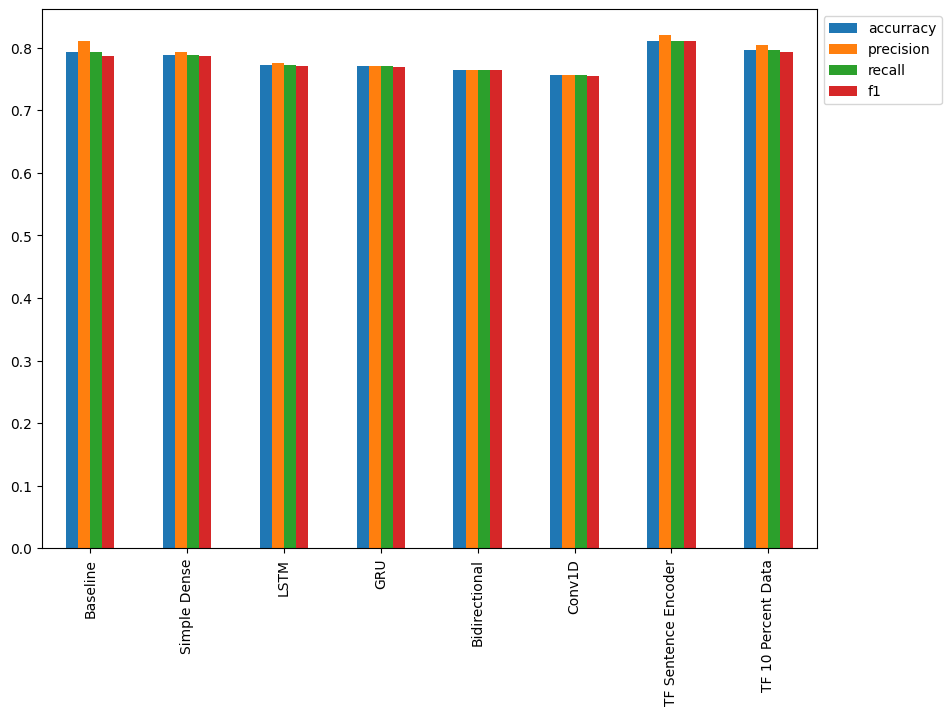

In [200]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

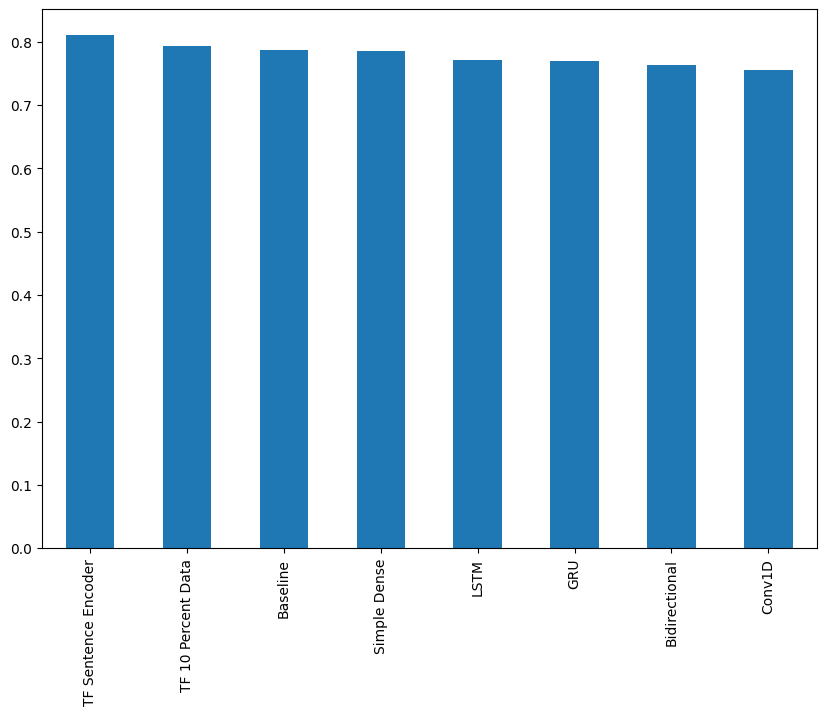

In [201]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Model Ensembling 

In [202]:
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis = 1)

#combining prediction probabilities
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)

#averaging the prediction
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]                       

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [203]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accurracy': 79.00262467191601,
 'precision': 0.7899413404218827,
 'recall': 0.7900262467191601,
 'f1': 0.7893166827702129}

In [204]:
ensemble_results["accurracy"] = ensemble_results["accurracy"] / 100
ensemble_results["accurracy"] 

0.7900262467191601

In [205]:
all_model_results.loc["Ensemble Results"] = ensemble_results

In [206]:
all_model_results

,accurracy,precision,recall,f1
Baseline,0.792651,0.811139,0.792651,0.786219
Simple Dense,0.788714,0.793057,0.788714,0.785956
LSTM,0.772966,0.775649,0.772966,0.770438
GRU,0.770341,0.770288,0.770341,0.769333
Bidirectional,0.763780,0.763520,0.763780,0.763602
Conv1D,0.755906,0.755582,0.755906,0.754985
TF Sentence Encoder,0.811024,0.820114,0.811024,0.810554
TF 10 Percent Data,0.796588,0.804169,0.796588,0.793067
Ensemble Results,0.790026,0.789941,0.790026,0.789317


In [207]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_7_preds,
                       "pred_prob": tf.squeeze(model_7_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.268827
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.770848
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,1.035484
3,@camilacabello97 Internally and externally scr...,1,0.0,0.116381
4,Radiation emergency #preparedness starts with ...,1,1.0,0.623125


In [208]:
# most wronged predictions
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
759,FedEx will no longer transport bioterror patho...,0,1.0,0.834415
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.770848
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.730688
549,Day 2. Liquidation of emergency at chemical ob...,0,1.0,0.711272
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.710154
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.698815
360,Texas Seeks Comment on Rules for Changes to Wi...,0,1.0,0.694015
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.688942
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.674546
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.671260


In [209]:
# False positives Most Wrong
for row in most_wrong[:10].itertuples():
    _, text, target, pred, prob = row
    print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 0, Pred: 1, Prob: 0.8344152569770813
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.7708482146263123
Text:
FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday

----

Target: 0, Pred: 1, Prob: 0.7306876182556152
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.7112718224525452
Text:
Day 2. Liquidation of emergency at chemical object. #USAR2015 #USAR15 #RUOR #??????????? http://t.co/gGTmDqUdDo

----

Target: 0, Pred: 1, Prob: 0.7101536989212036
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.6988154649734497
Text:
Air Group is here to the rescue! We have 24/7 Emergency Service

In [210]:
# false negatives
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, prob = row
    print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 1, Pred: 0, Prob: 0.019319068640470505
Text:
@GodOf_Mischief_ -of Loki's daggers she pulled it out and jammed it into Mina's thigh. When Mina screamed and grabbed at her leg sif-

----

Target: 1, Pred: 0, Prob: 0.009843464940786362
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.00014119967818260193
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.0
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0, Prob: 0.0
Text:
If I fall is men GOD @Praiz8 is d bomb well av always known dat since 2008 bigger u I pray sir

----

Target: 1, Pred: 0, Prob: 0.0
Text:
Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP

----

Target: 1, Pred: 0, Prob: 0.0
Text:
Indeed!

## Making Prediction On Test Data

In [211]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [212]:
# making prediction on test data
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
    pred_prob = tf.squeeze(model_6.predict([test_sample]))
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}, Prob: {pred_prob}")
    print(f"Text:\n{test_sample}\n")
    print("----\n")
  

1/1 [==============================] - 0s 43ms/step
Pred: 0, Prob: 0.12780439853668213
Text:
First responders tell me he is lucky.... had someone riding with him today. http://t.co/jc16CZn0NC

----

1/1 [==============================] - 0s 43ms/step
Pred: 0, Prob: 0.06662888079881668
Text:
Created save #666 on my current Fallout 3 playthrough. Hail Satan!

----

1/1 [==============================] - 0s 41ms/step
Pred: 1, Prob: 0.5793657898902893
Text:
This dude just pulled in front of our production with his truck on fire. Cops pulled up after we put it out http://t.co/e7DRPQUW4G

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: 0.5264661908149719
Text:
The dust storm chase scene is pretty damn cool. #GhostProtocol

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: 1.0170738697052002
Text:
#?? #?? #??? #??? The Latest: More Homes Razed by Northern California Wildfire - New York Times  http://t.co/IPnHSIyorc-

----

1/1 [=================

In [213]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [214]:
pred_prob = tf.squeeze(model_6.predict(test_df["text"].to_numpy()))
pred = tf.round(pred_prob)
pred_prob[:10]

102/102 [==============================] - 1s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.52173406, 0.84867346, 0.86173   , 0.96525025, 1.1235434 ,
       0.64909047, 0.01546113, 0.        , 0.        , 0.        ],
      dtype=float32)>

In [215]:
pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [216]:
test_data = test_df[:]

In [217]:
submission = test_df[['id']].reset_index(drop=True)
submission['target'] = tf.cast(pred, tf.int64)
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0


In [218]:
submission.to_csv('submission.csv', index=False)